# RANDOM FOREST

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold,train_test_split,cross_val_score,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [12]:
df = pd.read_csv('dia_clean.csv')
df

,Unnamed: 0,preg,plas,pres,skin,mass,pedi,age,class
0,0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
728,763,10,101.0,76.0,48.0,32.9,0.171,63,0
729,764,2,122.0,70.0,27.0,36.8,0.340,27,0
730,765,5,121.0,72.0,23.0,26.2,0.245,30,0
731,766,1,126.0,60.0,29.0,30.1,0.349,47,1


In [4]:
df[df.duplicated]

,Unnamed: 0,preg,plas,pres,skin,mass,pedi,age,class


In [6]:
df = df.drop(columns = 'Unnamed: 0',axis = 1)
df

,preg,plas,pres,skin,mass,pedi,age,class
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
728,10,101.0,76.0,48.0,32.9,0.171,63,0
729,2,122.0,70.0,27.0,36.8,0.340,27,0
730,5,121.0,72.0,23.0,26.2,0.245,30,0
731,1,126.0,60.0,29.0,30.1,0.349,47,1


In [8]:
df['class'].value_counts()

class
0    481
1    252
Name: count, dtype: int64

In [9]:
X = df.drop(columns = 'class',axis = 1)
y = df['class']

In [17]:
kfold = StratifiedKFold(n_splits = 10,random_state = 3,shuffle = True)
model = RandomForestClassifier(n_estimators= 200,random_state = 20,max_depth=None)
results = cross_val_score(model,X,y,cv= kfold)
print(results)
print("Mean:",results.mean(),"\nStd:",np.std(results))

[0.7972973  0.74324324 0.78378378 0.79452055 0.75342466 0.69863014
 0.80821918 0.80821918 0.76712329 0.79452055]
Mean: 0.7748981858570899 
Std: 0.03303291904792223


## Hyperparameter tuning

In [20]:
from  sklearn.model_selection import GridSearchCV 
rf = RandomForestClassifier(random_state = 42,n_jobs = -1)
params = {
    'max_depth' : [2,3,5,None],
    'min_samples_leaf' : [5,10,20],
    'n_estimators' : [100,200,500],
    'max_features' : ['sqrt','log2',None],
    'criterion' : ['gini','entropy']
}

gds = GridSearchCV(estimator = rf,param_grid = params,cv = 5,n_jobs = -1,verbose = 10,scoring = 'accuracy')
gds.fit(X,y)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5; 1/216] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100
[CV 1/5; 1/216] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100;, score=0.748 total time=   0.6s
[CV 1/5; 2/216] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=200
[CV 1/5; 2/216] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=200;, score=0.755 total time=   0.9s
[CV 5/5; 2/216] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=200
[CV 5/5; 2/216] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=200;, score=0.740 total time=   0.9s
[CV 4/5; 3/216] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=500
[CV 4/5; 3/216] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, n_esti

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=10)

[CV 4/5; 209/216] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=5, n_estimators=200;, score=0.808 total time=   1.1s
[CV 3/5; 210/216] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=5, n_estimators=500
[CV 3/5; 210/216] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=5, n_estimators=500;, score=0.789 total time=   2.6s
[CV 2/5; 211/216] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=10, n_estimators=100
[CV 2/5; 211/216] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=10, n_estimators=100;, score=0.721 total time=   0.5s
[CV 5/5; 211/216] START criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=10, n_estimators=100
[CV 5/5; 211/216] END criterion=entropy, max_depth=None, max_features=None, min_samples_leaf=10, n_estimators=100;, score=0.774 total time=   0.5s
[CV 3/5; 212/216] START criterion=entropy, max_depth=None, max_feat

In [21]:
print("Best Parameters:", gds.best_params_)
print("Best Score:", gds.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 200}
Best Score: 0.7790327089740006


In [22]:
best_model = RandomForestClassifier(criterion='gini',max_depth= 5,max_features ='sqrt',min_samples_leaf = 5,n_estimators = 200)
best_model.fit(X,y)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200)

In [24]:
y_pred = best_model.predict(X)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [26]:
print('Classification Report:\n',classification_report(y,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       481
           1       0.82      0.65      0.73       252

    accuracy                           0.83       733
   macro avg       0.83      0.79      0.80       733
weighted avg       0.83      0.83      0.83       733



# ADA BOOST


In [36]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold,cross_validate
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [30]:
df = pd.read_csv('dia_clean.csv')
df

,Unnamed: 0,preg,plas,pres,skin,mass,pedi,age,class
0,0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
728,763,10,101.0,76.0,48.0,32.9,0.171,63,0
729,764,2,122.0,70.0,27.0,36.8,0.340,27,0
730,765,5,121.0,72.0,23.0,26.2,0.245,30,0
731,766,1,126.0,60.0,29.0,30.1,0.349,47,1


In [31]:
df = df.drop('Unnamed: 0',axis = 1)
df

,preg,plas,pres,skin,mass,pedi,age,class
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
728,10,101.0,76.0,48.0,32.9,0.171,63,0
729,2,122.0,70.0,27.0,36.8,0.340,27,0
730,5,121.0,72.0,23.0,26.2,0.245,30,0
731,1,126.0,60.0,29.0,30.1,0.349,47,1


In [32]:
X = df.drop(columns = 'class',axis = 1)
y = df['class']

In [33]:
base_estimator = DecisionTreeClassifier(max_depth=1,random_state = 42)

In [35]:
model1 = AdaBoostClassifier(
    estimator = base_estimator,
    n_estimators = 100,
    learning_rate = 1.0,
    random_state = 42
)

In [37]:
skf = StratifiedKFold(n_splits = 5,shuffle = True,random_state = 42)
# multiple metrics with cross validate
scoring = ['accuracy','precision','recall','f1']
results = cross_validate(model1,X,y,cv = skf,scoring = scoring,return_train_score = False)

In [38]:
print("Accuracy per fold:",results['test_accuracy'])
print("Precision per fold:",results['test_precision'])
print("Recall per fold:",results['test_recall'])
print("F1 per fold:",results['test_f1'])

Accuracy per fold: [0.78911565 0.72789116 0.78231293 0.70547945 0.73972603]
Precision per fold: [0.7173913  0.62222222 0.68       0.57142857 0.63043478]
Recall per fold: [0.64705882 0.54901961 0.68       0.56       0.58      ]
F1 per fold: [0.68041237 0.58333333 0.68       0.56565657 0.60416667]


In [39]:
print("Mean Accuracy :",np.mean(results['test_accuracy']))
print("Mean Precision :",np.mean(results['test_precision']))
print("Mean Recall :",np.mean(results['test_recall']))
print("Mean F1 :",np.mean(results['test_f1']))

Mean Accuracy : 0.7489050414686422
Mean Precision : 0.6442953761214631
Mean Recall : 0.6032156862745099
Mean F1 : 0.6227137873581172


# GRADIENT BOOSTING

In [41]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold,cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [42]:
df = pd.read_csv('dia_clean.csv')
df

,Unnamed: 0,preg,plas,pres,skin,mass,pedi,age,class
0,0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
728,763,10,101.0,76.0,48.0,32.9,0.171,63,0
729,764,2,122.0,70.0,27.0,36.8,0.340,27,0
730,765,5,121.0,72.0,23.0,26.2,0.245,30,0
731,766,1,126.0,60.0,29.0,30.1,0.349,47,1


In [43]:
df = df.drop('Unnamed: 0',axis = 1)
df

,preg,plas,pres,skin,mass,pedi,age,class
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
728,10,101.0,76.0,48.0,32.9,0.171,63,0
729,2,122.0,70.0,27.0,36.8,0.340,27,0
730,5,121.0,72.0,23.0,26.2,0.245,30,0
731,1,126.0,60.0,29.0,30.1,0.349,47,1


In [44]:
X = df.drop(columns = 'class',axis = 1)
y = df['class']

In [45]:
gb = GradientBoostingClassifier(random_state= 42)

In [46]:
skf = StratifiedKFold(n_splits =5 ,random_state= 42,shuffle=True)

In [47]:
y_pred = cross_val_predict(gb,X,y,cv = skf)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [50]:
print(classification_report(y,y_pred,output_dict=False))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       481
           1       0.66      0.60      0.63       252

    accuracy                           0.76       733
   macro avg       0.73      0.72      0.72       733
weighted avg       0.75      0.76      0.75       733



# XG BOOST

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import matplotlib.colors as ListedColormap
from sklearn.manifold import TSNE

In [3]:
df = pd.read_csv("dia_clean.csv")
df

,Unnamed: 0,preg,plas,pres,skin,mass,pedi,age,class
0,0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
728,763,10,101.0,76.0,48.0,32.9,0.171,63,0
729,764,2,122.0,70.0,27.0,36.8,0.340,27,0
730,765,5,121.0,72.0,23.0,26.2,0.245,30,0
731,766,1,126.0,60.0,29.0,30.1,0.349,47,1


In [4]:
X = df.drop(columns = ['Unnamed: 0','class'],axis = 1 )
y = df['class']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
xgb = XGBClassifier(n_estimators = 200,
                   use_label_encoder = False,
                   eval_metric = 'logloss',
                   learning_rate = 0.08,
                   max_depths = 6,
                   reg_alpha = 0.01,
                   reg_lambda = 5)


In [7]:
skf = StratifiedKFold(n_splits = 5,random_state = 42,shuffle = True)
scores = cross_val_score(xgb,X_scaled,y,cv=skf,scoring = 'accuracy')
print("Accuracy score:",scores)
print("Mean Accuracy:",scores.mean())

/home/rgukt/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:56:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "max_depths", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/rgukt/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:56:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "max_depths", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/rgukt/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:56:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "max_depths", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/rgukt/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:56:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "max_depths", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/rgukt/

Accuracy score: [0.78911565 0.76190476 0.7414966  0.73287671 0.76712329]
Mean Accuracy: 0.7585034013605443


In [8]:
data_tsne = TSNE(n_components = 2,perplexity = 30).fit_transform(X_scaled)
data_tsne

array([[ 25.480524 ,   6.1195407],
       [-27.999659 , -12.884777 ],
       [ 24.97183  ,  -2.8914158],
       ...,
       [ -2.4207609,   9.303152 ],
       [  2.0086286,   3.470908 ],
       [-15.048375 , -13.427742 ]], dtype=float32)

In [9]:
model = XGBClassifier()
model.fit(data_tsne,y)

# Create meshgrid
x_min,x_max = data_tsne[:,0].min()-1,data_tsne[:,0].max()+1
y_min,y_max = data_tsne[:,1].min()-1,data_tsne[:,1].max()+1
xx , yy = np.meshgrid(np.linspace(x_min,x_max,500),
                      np.linspace(y_min,y_max,500))

#predict on meshgrid
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

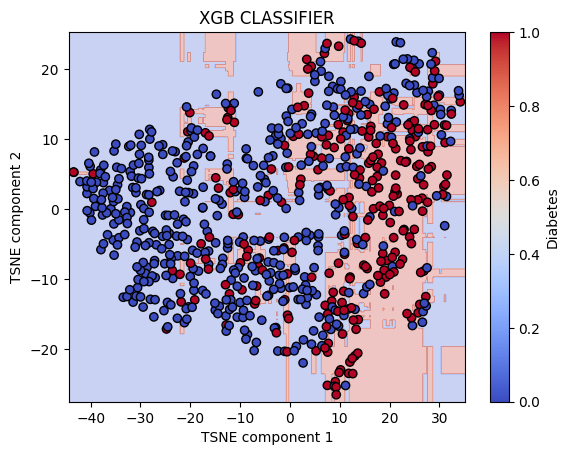

In [10]:
# plot decision boundary
plt.contourf(xx,yy,Z,alpha=0.3,cmap = plt.cm.coolwarm)
plt.scatter(data_tsne[:,0],data_tsne[:,1],c=y,cmap = plt.cm.coolwarm,edgecolors = 'k')
plt.title("XGB CLASSIFIER")
plt.xlabel("TSNE component 1")
plt.ylabel("TSNE component 2")
plt.colorbar(label = 'Diabetes')
plt.show()

# CAT BOOST

In [2]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier,Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [3]:
df = pd.read_csv("Rossmann.csv")
df

/tmp/ipykernel_3744/2061841615.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Rossmann.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
df = df.dropna()

In [7]:
df[df.duplicated]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [8]:
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
df['Sales'].value_counts()

Sales
0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: count, Length: 21734, dtype: int64

In [10]:
df = df[~((df['Open'] == 0) & (df['Sales'] == 0))]
df = df.reset_index(drop=True)
df.shape

(844392, 9)

In [11]:
df['HighSales'] = (df['Sales']>= df['Sales'].median()).astype(int)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,HighSales
0,1,5,2015-07-31,5263,555,1,1,0,1,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,1
4,5,5,2015-07-31,4822,559,1,1,0,1,0


In [12]:
X = df.drop(columns = ['Store','HighSales','Date','Sales'])
y = df['HighSales']

In [13]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [19]:
model = CatBoostClassifier(iterations = 500,learning_rate=0.1,depth = 6,loss_function = 'Logloss',eval_metric = 'Accuracy',
                          random_seed = 42,verbose=100)

In [20]:
train_pool = Pool(X_train,y_train,cat_features = cat_features) 
test_pool =  Pool(X_test,y_test,cat_features = cat_features) 

In [21]:
model.fit(train_pool,eval_set = test_pool , early_stopping_rounds = 50)

y_pred = model.predict(X_test)
y_pred

0:	learn: 0.8295103	test: 0.8300677	best: 0.8300677 (0)	total: 614ms	remaining: 5m 6s
100:	learn: 0.8374095	test: 0.8375997	best: 0.8377300 (60)	total: 33.8s	remaining: 2m 13s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8377299723
bestIteration = 60

Shrink model to first 61 iterations.


array([0, 1, 0, ..., 1, 1, 1])

In [22]:
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Classification Report:\n",classification_report(y_pred,y_test))

Accuracy: 0.837729972347065
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84     84503
           1       0.84      0.84      0.84     84376

    accuracy                           0.84    168879
   macro avg       0.84      0.84      0.84    168879
weighted avg       0.84      0.84      0.84    168879



## EXERCISE